#Keras

## *Keras는 Python으로 작성 되었으며 TensorFlow, CNTK, Theano와 같은 Deep Learning 라이브러리 위에서 실행할 수 있는 High-level Neural Network API 입니다.*

## 케라스 임포트

In [0]:
import numpy as np
np.random.seed(123)  # for reproducibility

import keras
	
from keras.utils import np_utils

# 데이타


(60000, 28, 28)


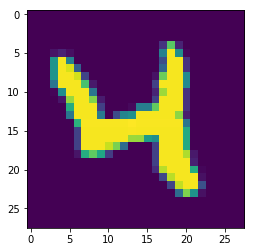

In [20]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(X_train.shape)
# (60000, 28, 28)

from matplotlib import pyplot as plt
plt.imshow(X_train[20])

#전처리

In [25]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

print(X_train.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape)

print(y_train.shape)

# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape)

print(y_train[10])
print(Y_train[10])

(60000, 1, 28, 28)
(60000, 1, 28, 28)
(60000,)
(60000, 10)
3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


#모델

Keras에서 레이어(Layer)들을 구성하는 방법으로 사용되는 핵심적인 자료구조형은 모델(Model)입니다. 

그 중에서도 가장 간단한 형태의 모델은 레이어들을 선형으로 쌓는 Sequential Model 입니다.

In [0]:
from keras.models import Sequential

model = Sequential()

레이어는 다음과 같이 간단하게 .add()를 통해 추가할 수 있습니다.

In [34]:
from keras.layers import Dense, Dropout, Activation, Flatten

model.add(Dense(units=64, activation='relu', input_shape=(1,28,28)))

model.add(Flatten())

model.add(Dense(units=10, activation='softmax'))

print("#### Sequential Model")
model.summary()

#### Sequential Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1, 28, 64)         1856      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 28, 10)         650       
_________________________________________________________________
dense_7 (Dense)              (None, 1, 28, 64)         704       
_________________________________________________________________
dense_8 (Dense)              (None, 1, 28, 64)         4160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                17930     
Total params: 2,506
Trainable params: 2,506
Non-trainable params: 0
____________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


.compile()을 통해 학습 방법을 설정

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

.fit()을 통해 모델에 직접 학습데이터(Train Data)를 넣어 학습 시킬 수 있습니다.

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)


Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/10
60000/60000 [==============================] - 12s 206us/step - loss: 2.3016 - acc: 0.1112
Epoch 2/10
60000/60000 [==============================] - 12s 197us/step - loss: 2.3014 - acc: 0.1124
Epoch 3/10
60000/60000 [==============================] - 11s 179us/step - loss: 2.3014 - acc: 0.1124
Epoch 4/10
60000/60000 [==============================] - 11s 191us/step - loss: 2.3014 - acc: 0.1124
Epoch 5/10
60000/60000 [==============================] - 11s 190us/step - loss: 2.3014 - acc: 0.1124
Epoch 6/10
60000/60000 [==============================] - 11s 190us/step - loss: 2.3013 - acc: 0.1124
Epoch 7/10
60000/60000 [==============================] - 11s 191us/step - loss: 2.3014 - acc: 0.1124
Epoch 8/10
60000/60000 [==============================] - 11s 189us/step - loss: 2.3013 - acc: 0.1124
Epoch 9/10
60000/60000 [==============================] - 

모델이 학습이 완료되면, 단 한줄로 평가가 가능합니다.

In [0]:
loss_and_metrics = model.evaluate(X_test_std, Y_test, batch_size=128)


예측(Predict)도 가능합니다.

In [0]:
classes = model.predict(X_test_std, batch_size=105)